<a href="https://colab.research.google.com/github/Reptilefury/coursera-machine-learning/blob/main/Reshaping_4D_to_2D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [79]:
import numpy as np

In [80]:
#Lets create a 3D array
array_3d = np.reshape(np.arange(24),(2,3,4))
array_3d

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]],

       [[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]])

In [81]:
array_2d = np.reshape(array_3d,(6,4)) #Reshape the 3D array into a 2D array
array_2d 
#The new 2D array takes the shape and form  of the original np.arange(24) it takes all the contents from 0 to 24 and fills it in the array

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23]])

In [82]:
#This is similar to: reshaping a vector i.e when reshaping an array 
#into a certain dimension the size of the new shape must be equal to the size of the old shape 
array_2d.shape

(6, 4)

Reshaping to 4D 


In [83]:
!pip install nipraxis
import nipraxis
#Fetch the 4D file
bold_fname = nipraxis.fetch_file("ds114_sub009_t2r1.nii")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


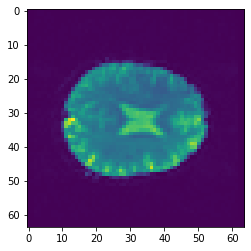

In [84]:
bold_fname

#import nibabel 
import nibabel as nib

data = nib.load(bold_fname)

#load the image data into memory 
image = data.get_fdata()
image.shape #We can see that this is a 4D array because it has 4 dimensions 
#64 rows 64 columns 30  planes 
#We can view one slice of the brain
slice_brain = image[:,:,:,0]
slice_brain.shape
#Lets get a 2d slice from one of the thirty planes 
slice_one = slice_brain[:,:,15] #Middle slice of the brain 
slice_one.shape
import matplotlib.pyplot as plt
plt.imshow(slice_one)

In [85]:
image.shape 
image.shape[:-1] #We can think of the 4D array  as a sequence of 3D volumes stacked up 

(64, 64, 30)

In [86]:
#To get the number of voxels in a volume we use the np.prod function 
vol_shape_3d = image.shape[:-1]
np.prod(vol_shape_3d) #Total number of voxels in this 3d array is 122,880 voxels 
#A voxel is a cubic volume that spans the 3d location of the brain 

122880

In [87]:
#Get the total number of images in an array 
image_fourD= nipraxis.fetch_file("ds114_sub009_t2r1.nii")

#Load the data with nibabel 
image_data = nib.load(image_fourD)

#Lets load the image to memory using nibabel's get method 
image = image_data.get_fdata()
image.shape #We can see that it is a 4D array

(64, 64, 30, 173)

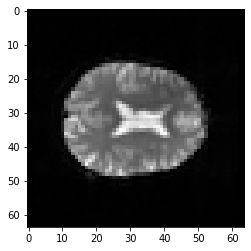

In [88]:
#Visualize a 2d array from the 4D array 
image_3d_first = image[:,:,:,0]

image_4d_first.shape
image_2d_first_plane = image_4d_first[:,:,14]
#image_2d_first_plane
plt.imshow(image_2d_first_plane, cmap='gray')

In [89]:
#Lets get the total number of voxels in this scan
image_3d = image[:,:,:,0]
image_3d.size #One way to get the total number of voxels
image_3d.shape
#Get the total number of voxels using numpy's prod function 
num_voxels = np.prod(image_3d.shape)
num_voxels

122880

In [90]:
#We can reshape the array to 2D with voxels on the first axis and time volume on the second axis
image_2d = np.reshape(image,(num_voxels,image.shape[-1]))
image_2d.shape

(122880, 173)

In [91]:
#Lets calculate the mean across all voxels at each time stop 
image_fname = nipraxis.fetch_file("ds114_sub009_t2r1.nii")
image_fname
#Load the file with nibabel 
image =  nib.load(image_fname) 
#Get the nibabel image data 
image_data = image.get_fdata()
image_data.shape #4D size of the image

(64, 64, 30, 173)

In [94]:
#Get the image 
num_voxels = np.prod(image_data.shape[:-1])
num_voxels #Total number of voxels

122880

In [110]:
image_data.shape
#Calculate the mean across all voxels for a single volume 
np.mean(image_data[...,0]) 

414.40107421875

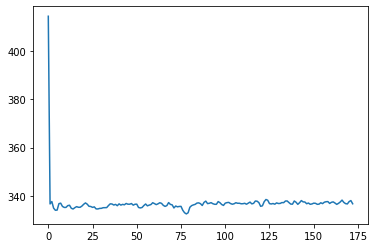

In [108]:
n_trs = image_data.shape[-1] #Get the total number of timestops
n_trs  #This in total is 173 
means = []
for vol_num in range(n_trs):
  vol = image_data[...,vol_num]
  means.append(np.mean(vol))

plt.plot(means)

Vectorizing is when  we take an operation that needed a loop  and  use array operations to do that operation instead

In [115]:
voxels_by_time = np.reshape(image_data,(num_voxels,n_trs))
voxels_by_time.shape

(122880, 173)

In [121]:
means_vectorized = np.mean(voxels_by_time,axis = 0)

#means_vectorized.shape

#The answer is the same allowing for tiny variations
assert np.allclose(means_vectorized,means)
